In [9]:
#Let's implement a linear model with sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [10]:
car_price = pd.read_csv("CarPrice_Assignment.csv", sep=',')
df_car_price = pd.DataFrame(car_price)
df_car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


We saw on Power Bi some linear relation with these plots
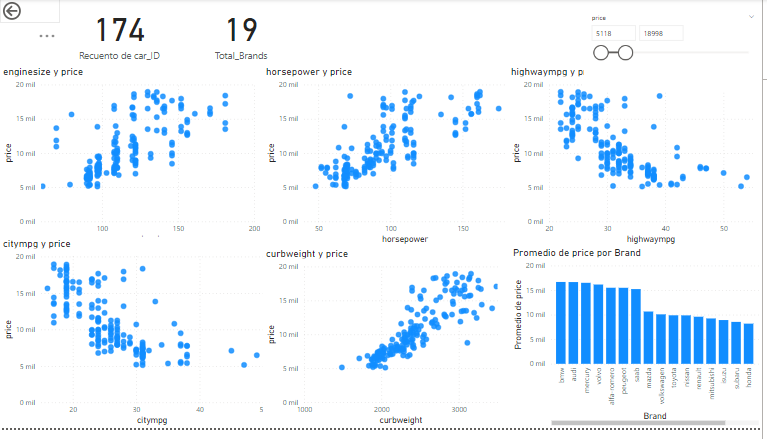

So we will only take those to build our linear regression model

In [11]:
df_car_price_model = df_car_price[["enginesize","horsepower","highwaympg","citympg","curbweight","price"]]
df_car_price_model

,enginesize,horsepower,highwaympg,citympg,curbweight,price
0,130,111,27,21,2548,13495.0
1,130,111,27,21,2548,16500.0
2,152,154,26,19,2823,16500.0
3,109,102,30,24,2337,13950.0
4,136,115,22,18,2824,17450.0
...,...,...,...,...,...,...
200,141,114,28,23,2952,16845.0
201,141,160,25,19,3049,19045.0
202,173,134,23,18,3012,21485.0
203,145,106,27,26,3217,22470.0


In [12]:
#We create numpy arrays to define X and Y

X = np.array(df_car_price_model[["enginesize","horsepower","highwaympg","citympg","curbweight"]])
#X = np.array(df_car_price_model[["enginesize","horsepower","curbweight"]])
Y = np.array(df_car_price_model["price"])

print(X.shape)
print(Y.shape)

(205, 5)
(205,)


In [13]:
#Then, we prepare train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#We scale X_train and X_text
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
scaler = StandardScaler()
X_norm_test = scaler.fit_transform(X_test)

print(X_norm_train.shape)
print(X_norm_test.shape)

(164, 5)
(41, 5)


In [14]:
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm_train,axis=0)}")

Peak to Peak range by column in Raw        X:[ 265  240   38   36 2578]
Peak to Peak range by column in Normalized X:[6.11734739 5.99979422 5.33117312 5.3860117  4.8607018 ]


In [15]:
#Create and fit regression model
model_linear_SGD = SGDRegressor(max_iter=1000)
model_linear_SGD.fit(X_norm_train, y_train)
print(model_linear_SGD)
print(f"number of iterations completed: {model_linear_SGD.n_iter_}, number of weight updates: {model_linear_SGD.t_}")

SGDRegressor()
number of iterations completed: 25, number of weight updates: 4101.0


In [16]:
b_norm = model_linear_SGD.intercept_
w_norm = model_linear_SGD.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [3498.15197547 1460.98752158  -76.28091786   93.47695678 2825.27341798], b:[13577.75819634]


In [17]:
# make a prediction using sgdr.predict()
y_pred_sgd_train = model_linear_SGD.predict(X_norm_train)

print(f"Prediction on train set:\n{y_pred_sgd_train[:3]}" )
print(f"Target values \n{y_train[:3]}")

y_pred_sgd_test = model_linear_SGD.predict(X_norm_test)

print(f"Prediction on test set:\n{y_pred_sgd_test[:3]}" )
print(f"Target values \n{y_test[:3]}")

Prediction on train set:
[10297.3515964  10836.14610301 11401.6277489 ]
Target values 
[ 9960. 16925.  9959.]
Prediction on test set:
[14394.75389638 10659.34355792 16759.37121842]
Target values 
[11048.  6785. 15580.]


In [18]:
print("Accuracy on training set:", r2_score(y_train, y_pred_sgd_train))
print("Accuracy on test set:", r2_score(y_test, y_pred_sgd_test))

Accuracy on training set: 0.8209587367423152
Accuracy on test set: 0.7216862801540915


In [19]:
#We can see our model fits the training data well, but no so well on the test set. As we see, we have HIGH VARIANCE.

#We may try:
#Using more training data
#Using regularization
#Using less features

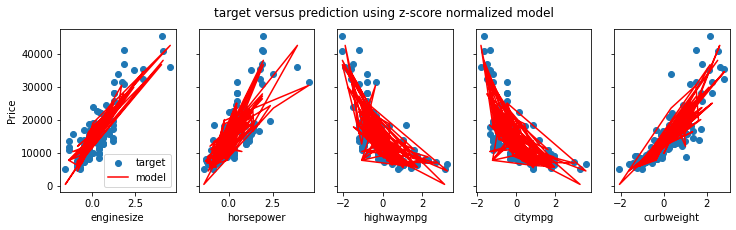

In [20]:
y_pred_train_sgd = model_linear_SGD.predict(X_norm_train)
# plot predictions and targets vs original features    

X_features = ["enginesize","horsepower","highwaympg","citympg","curbweight","price"]

fig,ax=plt.subplots(1,5,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm_train[:,i],y_train, label = 'target')
    ax[i].plot(X_norm_train[:,i],y_pred_train_sgd, label = 'model', c = "red")
    ax[i].set_xlabel(X_features[i])
    #ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

Text(0, 0.5, 'Price')

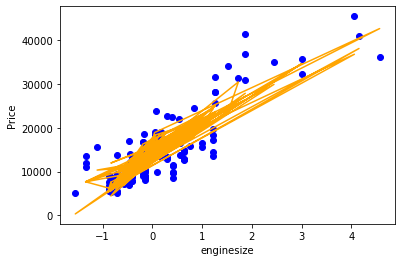

In [21]:
plt.plot(X_norm_train[:,0],y_pred_train_sgd, c = "orange")
plt.scatter(X_norm_train[:,0], y_train, c ="blue")
plt.xlabel(X_features[0])
plt.ylabel("Price")